# Simple password generator

## Functional approach

In [146]:
import numpy as np
import string as s

def passgen(
    pass_lenght=12, 
    numbers=True, 
    chars=True, 
    symbols=True, 
    upper=True):
    
    """
    Simple password maker and information about password strenght.
    """
    
    if (pass_lenght < 1 
        or numbers==False 
        and chars==False 
        and symbols==False 
        and upper==False):
    
        print("_"*105, "\nAt least lenght and one argument must be given.",
             "_"*105," ")
              
    else:
        
        pass_dictionary = []
    
        if numbers == True:
            pass_dictionary.extend(s.digits)
        if chars == True:
            pass_dictionary.extend(s.ascii_lowercase)
        if symbols == True:
            pass_dictionary.extend(s.punctuation)
        if upper == True:
            pass_dictionary.extend(s.ascii_uppercase)

        pass_dictionary_size = len(pass_dictionary)
        combinations = pass_dictionary_size**pass_lenght
        time_to_crack = ((1.7*10**-6*combinations)/2)/86400/365 
        
        password = "".join(np.random.choice(pass_dictionary, size=pass_lenght))        
        
        print(password)
        print("-"*82)
        print(f"Password elements: {pass_lenght}",
              f"\nPassword dictionary size: {pass_dictionary_size:,d}",
              f"\nPossible combinations: {combinations:,d}",
              f"\nTime to crack in years: ~{round(time_to_crack,1):,}",
              "(modern computer, 8 core, 2.8 GHz CPU)"
              f"\nTime to crack in years: ~{round(time_to_crack/100,1):,}",
              "(modern computer, with GPU or 3D card)",
              f"\nTime to crack in years: ~{round(time_to_crack/100000,1):,}",
              "(supercomputer or a botnet)")
        print("-"*82)


In [147]:
passgen(12,1,0,0,1)

R7F8L4RS2MDX
----------------------------------------------------------------------------------
Password elements: 12 
Password dictionary size: 36 
Possible combinations: 4,738,381,338,321,616,896 
Time to crack in years: ~127,715.1 (modern computer, 8 core, 2.8 GHz CPU)
Time to crack in years: ~1,277.2 (modern computer, with GPU or 3D card) 
Time to crack in years: ~1.3 (supercomputer or a botnet)
----------------------------------------------------------------------------------


## Using TKinter GUI

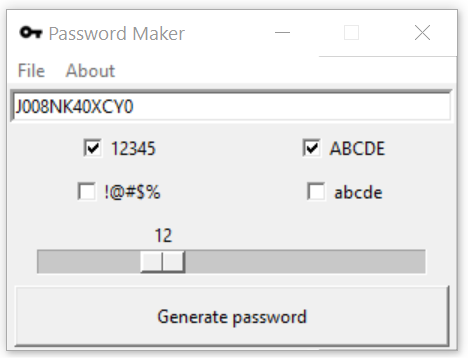

In [232]:
from IPython.display import Image
Image("pass.png", width=234, height=179)

In [139]:
import numpy as np
import string as s
import tkinter as tk

In [140]:
# creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.resizable(False, False)

# variables
LENGHT = tk.IntVar()
NUMBERS = tk.BooleanVar()
CHARACTERS = tk.BooleanVar()
UPPER = tk.BooleanVar()
SYMBOLS = tk.BooleanVar()

def passGen():
    
    lenght = LENGHT.get()
    numbers = NUMBERS.get()
    chars = CHARACTERS.get()
    symbols = SYMBOLS.get()
    upper = UPPER.get()
    
    if (lenght == 0 
        or numbers == 0 
        and chars == 0 
        and symbols == 0 
        and upper == 0):
        pass 
                
    else:
 
        bin = []
    
        if numbers == 1:
            bin.extend(s.digits)
        if chars == 1:
            bin.extend(s.ascii_lowercase)
        if symbols == 1:
            bin.extend(s.punctuation)
        if upper == 1:
            bin.extend(s.ascii_uppercase)
        
        passwd = "".join(np.random.choice(bin, size=lenght))
        e.delete(0,"end")
        e.insert(0,passwd)
        
# menus action
def create_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    aboutlabel = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.0")
    aboutlabel.pack()
    
# creating menus
menubar = tk.Menu(root)
filemenu = tk.Menu(menubar, tearoff=0)
filemenu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=filemenu)

aboutmenu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="About", command=create_window)
root.config(menu=menubar)

# creating output space 
e = tk.Entry(root, width=48, borderwidth=3)

# defining elements
checkBox1 = tk.Checkbutton(root, text="12345", onvalue=1, offvalue=0, variable=NUMBERS)
checkBox2 = tk.Checkbutton(root, text="ABCDE", onvalue=1, offvalue=0, variable=UPPER)
checkBox3 = tk.Checkbutton(root, text="!@#$%", onvalue=1, offvalue=0, variable=SYMBOLS)
checkBox4 = tk.Checkbutton(root, text="abcde", onvalue=1, offvalue=0, variable=CHARACTERS)
passLenght = tk.Scale(root, from_=0, to=40, orient="horizontal", length=260, variable=LENGHT)
passLenght.set(12)
generate = tk.Button(root,text="Generate password", height=2, width=40, command=passGen)

# constructing grid
e.grid(row=0, column=0, columnspan=2, padx=2,pady=2)
checkBox1.grid(row=2,column=0, padx=2,pady=2)
checkBox2.grid(row=2,column=1, padx=2,pady=2)
checkBox3.grid(row=3,column=0, padx=2,pady=2)
checkBox4.grid(row=3,column=1, padx=2,pady=2)
passLenght.grid(row=5,column=0, columnspan=2, padx=2,pady=2)
generate.grid(row=7,column=0, columnspan=2, padx=2,pady=2)

root.mainloop()

## Using TKinter GUI - Improved

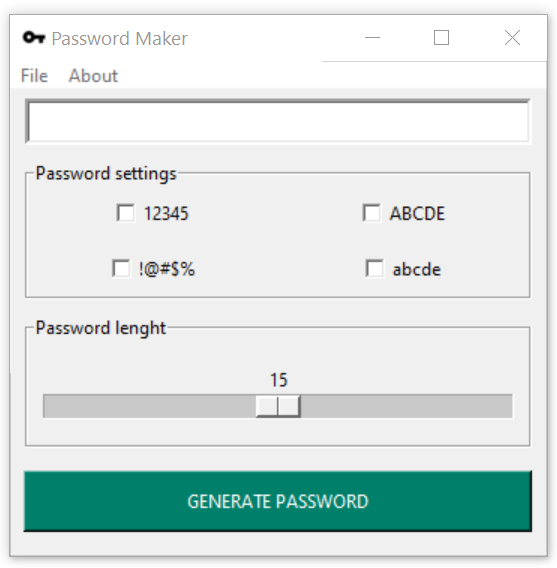

In [1]:
from IPython.display import Image
Image("pass2.png", width=278, height=284)

In [2]:
import numpy as np
import string as s
import tkinter as tk

In [141]:
# creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
#root.resizable(False, False)
root.geometry("358x330")

# variables
LENGHT = tk.IntVar()
NUMBERS = tk.BooleanVar()
CHARACTERS = tk.BooleanVar()
UPPER = tk.BooleanVar()
SYMBOLS = tk.BooleanVar()

def passGen():
    
    lenght = LENGHT.get()
    numbers = NUMBERS.get()
    chars = CHARACTERS.get()
    symbols = SYMBOLS.get()
    upper = UPPER.get()
    
   
    if (lenght == 0 
        or numbers == 0 
        and chars == 0 
        and symbols == 0 
        and upper == 0):
        pass 
                
    else:
 
        bin = []
    
        if numbers == 1:
            bin.extend(s.digits)
        if chars == 1:
            bin.extend(s.ascii_lowercase)
        if symbols == 1:
            bin.extend(s.punctuation)
        if upper == 1:
            bin.extend(s.ascii_uppercase)
        
        passwd = "".join(np.random.choice(bin, size=lenght))
        e.delete(0,"end")
        e.insert(0,passwd)
        
# menus action
def create_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    about_window.iconbitmap("key.ico")
    aboutlabel = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.0")
    aboutlabel.pack()
    
# creating menus
menubar = tk.Menu(root)
filemenu = tk.Menu(menubar, tearoff=0)
filemenu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=filemenu)

aboutmenu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="About", command=create_window)
root.config(menu=menubar)

# creating output space 
e = tk.Entry(root, borderwidth=3, font=1, width=30)
e.grid(row=0, column=0, padx=10, pady=5)

# creating a settings frame 
settingsFrame = tk.LabelFrame(root, text="Password settings",width=300)
settingsFrame.grid(row=1, column=0, padx=10, pady=5)
settingsFrame.grid_propagate(1)

checkBox1 = tk.Checkbutton(settingsFrame, text="12345", onvalue=1, offvalue=0, anchor="w", variable=NUMBERS, padx=50,pady=5)
checkBox2 = tk.Checkbutton(settingsFrame, text="ABCDE", onvalue=1, offvalue=0, anchor="e", variable=UPPER, padx=50,pady=5)
checkBox3 = tk.Checkbutton(settingsFrame, text="!@#$%", onvalue=1, offvalue=0, anchor="w", variable=SYMBOLS, padx=50,pady=5)
checkBox4 = tk.Checkbutton(settingsFrame, text="abcde", onvalue=1, offvalue=0, anchor="e", variable=CHARACTERS, padx=50,pady=5)

checkBox1.grid(row=0,column=0, padx=2,pady=2)
checkBox2.grid(row=0,column=1, padx=2,pady=2)
checkBox3.grid(row=1,column=0, padx=2,pady=2)
checkBox4.grid(row=1,column=1, padx=2,pady=2)

# creating a lenght frame 
lenghtFrame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
lenghtFrame.grid(row=3,column=0, padx=10, pady=5)
settingsFrame.grid_propagate(1)

passLenght = tk.Scale(lenghtFrame, from_=0, to=30, orient="horizontal", length=314, variable=LENGHT)
passLenght.set(15)

passLenght.grid(row=2,column=0, padx=5,pady=12)

# creating a pass gen button 
generate = tk.Button(root,text="GENERATE PASSWORD",height=2, width=47, foreground="white", background="#00806A", command=passGen)
generate.grid(row=4,column=0, padx=5,pady=10)

root.mainloop()